# Pandas for Data Analysis

In this third workshop we will focus on using the pandas library for data wrangling and analysis.

In [4]:
%%HTML
<div style="text-align: center">
<iframe width="560" height="315" src="https://youtube.com/embed/HjF98JryayQ" frameborder="0" allowfullscreen></iframe>

</div>

## Importing pandas

Fire up a Jupyter Notebook. The first thing we need to do once we've opened a new script in our `data_science` environment is to import the pandas library. You can read more about the library [here](https://pandas.pydata.org/).

In [4]:
import pandas as pd

We'll start by reading in some data using the pandas function `pd.read_csv`. The data are available via the http address below. This is the same data file that we looked at in the R workshop on ANOVA. 

24 participants responded to a word that was either common (i.e., high lexical frequency) or rare (i.e., low lexical frequency). This is our IV and is coded as ‘high’ vs. low’. Our DV is reaction time and is coded as ‘RT’. Subject number is coded as ‘Subject’. We want to know whether there is a difference between conditions (and if so, where that difference lies). 

We need to visualise the data, generate descriptives, and run the appropriate ANOVA to determine whether our independent variable (Condition) has an influence on our dependent variable (RT).

In [5]:
anova_data = pd.read_csv("https://raw.githubusercontent.com/ajstewartlang/02_intro_to_python_programming/main/data/ANOVA_data1.csv")

In [6]:
anova_data

,Subject,Condition,RT
0,1,low,1103
1,2,low,1170
2,3,low,1225
3,4,low,1084
4,5,low,1219
5,6,low,1203
6,7,low,1208
7,8,low,1311
8,9,low,1078
9,10,low,1326


In order to visualise the data we need to use the `matplotlib` library. This library contains a range of tools for visualising data. You can read more about it [here](https://matplotlib.org/). 

In [7]:
import matplotlib.pyplot as plt

In the code below we used the `plot` function from `pyplot`. We build our final plot layer be layer (similar to how we do things in `R` with `ggplot2`. We define our plot initially in terms of what's on the x-axis, what's on the y-axis, and then what marker we want to use - which in this case is blue circles.

After this, we then add an x-axis label, a y-axis label, and a title. We also set the margins to make the plot like nice.

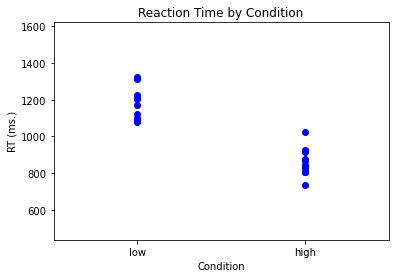

In [83]:
plt.plot(anova_data['Condition'], anova_data['RT'], 'bo')
plt.xlabel('Condition')
plt.ylabel('RT (ms.)')
plt.title('Reaction Time by Condition')
plt.margins(.5, .5)

Let's now work out some descriptive statistics using `pandas`  functions. We'll use the `groupby` function to group our RT data by condiiton, and we'll map this onto a new variable I'm calling `grouped`.

In [84]:
grouped = anova_data["RT"].groupby(anova_data["Condition"])

We can then generate some descriptives about this grouped data frame. We can use the `count` function to work out how many observations we have for each of our two conditions.

In [86]:
grouped.count()

Condition
high    12
low     12
Name: RT, dtype: int64

From the above we can see we have 12 observations in each condition, and our variable RT is type integer. We can use other `pandas` functions such as `mean()` and `std()` in a similar way.

In [90]:
grouped.mean()

Condition
high     864.666667
low     1178.166667
Name: RT, dtype: float64

In [91]:
grouped.std()

Condition
high    74.722923
low     85.708633
Name: RT, dtype: float64

We can map our means onto a new variable I'm calling `my_means` and then we can plot these means as a bar graph.

<AxesSubplot:xlabel='Condition'>

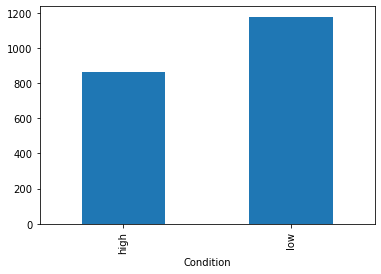

In [93]:
my_means = grouped.mean()
my_means.plot(kind = 'bar')